In [4]:
import requests
import cv2
from matplotlib import pyplot as plt 
import numpy as np

This notebook will help you understand homography matrix and RANSAC algorithm

When using first 4 points to compute Homograpy the no of inliers are 6 (Fig A).
When using last 4 points to compute Homograpy the no of inliers are 4 (Fig B).
The homography computed using the first 4 points provides a more reliable model 
and enables us to identify the correct 6 matches.



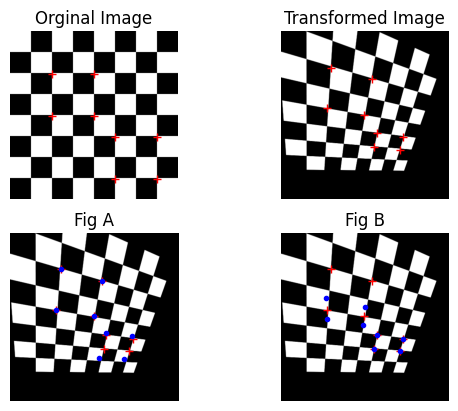

In [105]:
image1 = cv2.imread('../data/images/checkerboard1.png', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('../data/images/checkerboard2.png', cv2.IMREAD_GRAYSCALE)

# Assuming pts1 and pts2 represent two matched sets of 8 points.
# As we will see not all of them are correct matches
pts1 = np.array([[100, 100],[100, 200], [200, 100], [200,200], 
                 [250, 250],[250, 350], [350, 250], [350,350]]).astype(np.float32)
pts2 = np.array([(120, 86), (218, 114), (110, 183), (199, 198),
                (229, 242), (292, 251), (223, 275), (283, 281)]).astype(np.float32)

plt.subplot(221)
plt.imshow(image1, cmap='gray')
plt.plot(pts1[:,0], pts1[:,1],'r+')
plt.title('Orginal Image')
plt.axis('off')
plt.subplot(222)
plt.imshow(image2, cmap='gray')
plt.plot(pts2[:,0], pts2[:,1],'r+')
plt.title('Transformed Image')
plt.axis('off')

# Find the homography between the two set of points using the first 4 points
# and use that count the inliers
H = cv2.getPerspectiveTransform(pts1[0:4,:], pts2[0:4,:])
pts2_ = cv2.perspectiveTransform(pts1.reshape(8,1,2),H)
plt.subplot(223)
plt.imshow(image2, cmap='gray')
plt.plot(pts2[:,0], pts2[:,1],'r+')
plt.plot(pts2_[:,:,0].flatten(), pts2_[:,:,1].flatten(),'b.')
plt.title('Fig A')
plt.axis('off')

# Find the homography between the two set of points using the first 4 points
# and use that count the inliers
H = cv2.getPerspectiveTransform(pts1[4:,:], pts2[4:,:])
pts2_ = cv2.perspectiveTransform(pts1.reshape(8,1,2),H)
plt.subplot(224)
plt.imshow(image2, cmap='gray')
plt.plot(pts2[:,0], pts2[:,1],'r+')
plt.plot(pts2_[:,:,0].flatten(), pts2_[:,:,1].flatten(),'b.')
plt.title('Fig B')
plt.axis('off')

print('''When using first 4 points to compute Homograpy the no of inliers are 6 (Fig A).
When using last 4 points to compute Homograpy the no of inliers are 4 (Fig B).
The homography computed using the first 4 points provides a more reliable model 
and enables us to identify the correct 6 matches.
''')

In [107]:
# Use the following function to find the Homograpy matrix using RANSAC. 
H, mask = cv2.findHomography(pts1, pts2, cv2.RANSAC)
# mask contains the inliers
print('Inliers points in pts1 are:')
print(pts1[np.where(mask.flatten()==1)])

Inliers points in pts1 are:
[[100. 100.]
 [100. 200.]
 [200. 100.]
 [200. 200.]
 [250. 250.]
 [250. 350.]]
